In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import pdb


# Measured - Ground truth 

In [ ]:
chosedNum = [11,10,4,5,3,7,9]
tr = 8
fa = 90

###Gold standard
#print(str(tr)+"_"+str(fa))
GOLDSTD_mean = np.asarray([], dtype = float)
GOLDSTD_std = np.asarray([], dtype = float)

GOLDSTD_T2StarData = np.load("MASK_3RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")

### Mean and STD plot

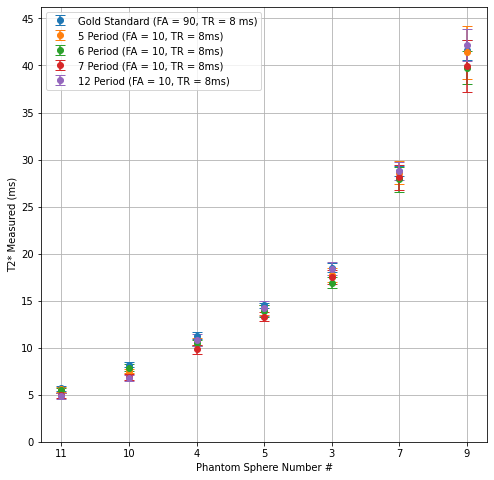

In [15]:
###Mean and STD plot of GOLD standard (90 flip angle) and N-Periodic comparing 

chosedNum = [11,10,4,5,3,7,9]
chosedNum_axis = [str(11),str(10),str(4),str(5),str(3),str(7),str(9)]
tr = 8
fa = 90

###Gold standard
#print(str(tr)+"_"+str(fa))
GOLDSTD_mean = np.asarray([], dtype = float)
GOLDSTD_std = np.asarray([], dtype = float)

T2StarData = np.load("MASK_3RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
for phantomNum in chosedNum:
    GOLDSTD_mean = np.append(GOLDSTD_mean, np.mean(T2StarData[phantomNum-1,:]))
    GOLDSTD_std = np.append(GOLDSTD_std, np.std(T2StarData[phantomNum-1,:]))
    #print("mean:"+str(np.mean(GOLDSTD_6TR_90[phantomNum-1,:]))+"_sd:"+str(np.std(GOLDSTD_6TR_90[phantomNum-1,:])))
    

fig, ax = plt.subplots(figsize = (8,8))
ax.errorbar(chosedNum_axis,GOLDSTD_mean*1e3,fmt='o', yerr=GOLDSTD_std*1e3,capsize=5, label = f"Gold Standard (FA = {str(fa)}, TR = {str(tr)} ms)")
ax.set_xlabel("Phantom Sphere Number #")
ax.set_ylabel("T2* Measured (ms)")

Period = [5,6,7,12]
###N Periodic 
for P in Period:
    N_Period_mean = np.asarray([], dtype = float)
    N_Period_std = np.asarray([], dtype = float)
    #print(str(tr)+"_"+str(P))
    T2StarData = np.load("MASK_3RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(P)+"_Period_10FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
    for phantomNum in chosedNum:
        N_Period_mean = np.append(N_Period_mean, np.mean(T2StarData[phantomNum-1,:]))
        N_Period_std = np.append(N_Period_std, np.std(T2StarData[phantomNum-1,:]))
        #print("mean:"+str(np.mean(T2StarData[phantomNum-1,:]))+"_sd:"+str(np.std(T2StarData[phantomNum-1,:])))
    ax.errorbar(chosedNum_axis,N_Period_mean*1e3,fmt='o', yerr=N_Period_std*1e3,capsize=5, label = f"{str(P)} Period (FA = 10, TR = {str(tr)}ms)")

    
plt.yticks(np.arange(0, 50, 5))
ax.legend()
ax.grid()
ax.figure.savefig("Mean_STD_Comparing_"+str(tr)+"TR_INRANGE.jpg")

### Bland-Altman Plot

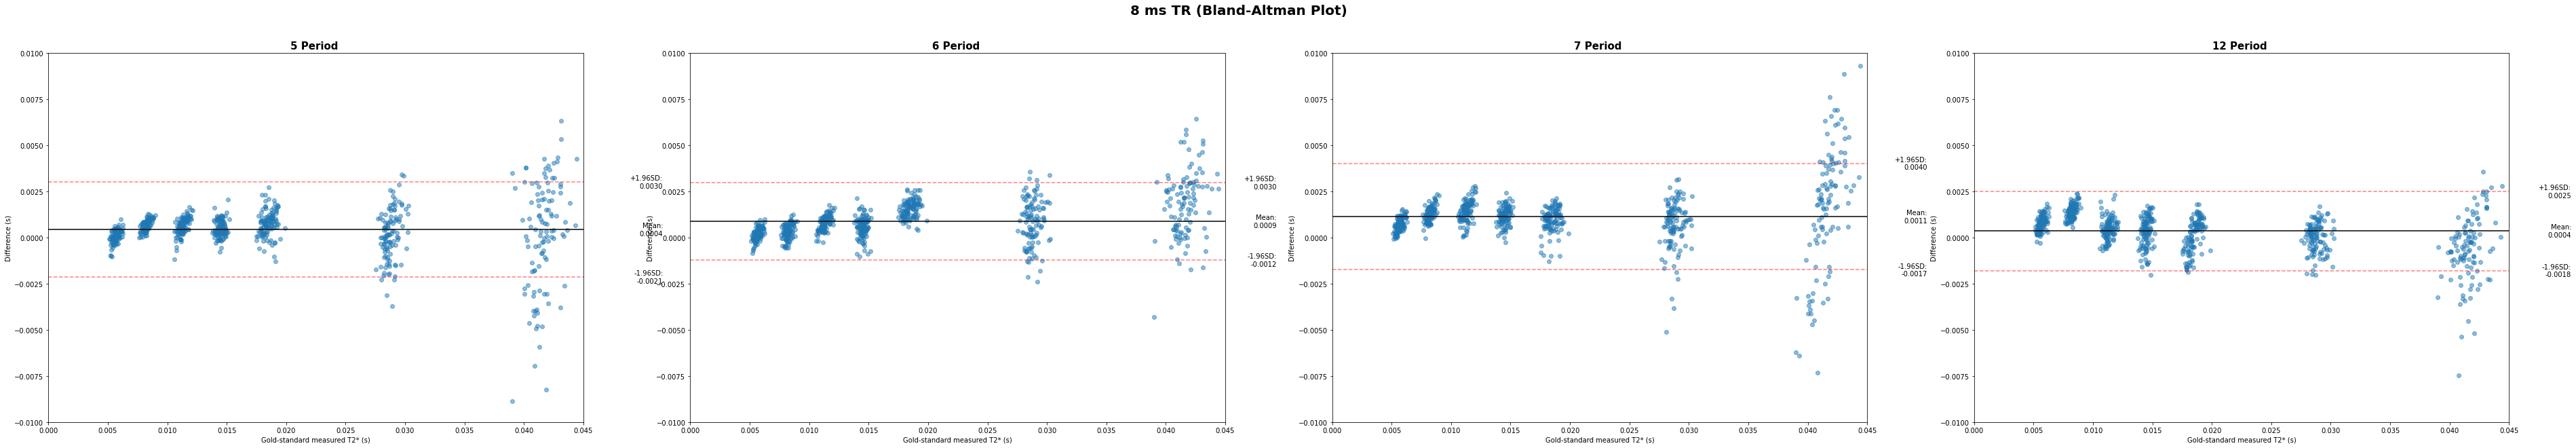

In [76]:
def bland_altman_plot(data1, data2, ax_BA, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    ax_BA.scatter(data1, diff, *args, **kwargs, alpha = 0.5)
    ax_BA.axhline(md,           color='black', linestyle='-')
    ax_BA.axhline(md + 1.96*sd, color='red', linestyle='--', alpha = 0.5)
    ax_BA.axhline(md - 1.96*sd, color='red', linestyle='--', alpha =0.5)
    return md, sd, mean, CI_low, CI_high
###-------------------------------------------------------------------

chosedNum = [11,10,4,5,3,7,9]
chosedNum_axis = [str(11),str(10),str(4),str(5),str(3),str(7),str(9),str(13)]
tr = 8
#gold standard
fa = 90

#N-periodic
Period = [5,6,7,12]
P = 12

BA_plot, ax = plt.subplots(1,4,figsize = (65,10))
BA_plot.suptitle(str(tr)+" ms TR (Bland-Altman Plot)", fontweight='bold', fontsize = 20)

###Gold standard
#print(str(tr)+"_"+str(fa))
GOLDSTD_mean = np.asarray([], dtype = float)
GOLDSTD_std = np.asarray([], dtype = float)
GOLDSTD_data = np.asarray([], dtype = float)

T2StarData = np.load("MASK_3RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
for phantomNum in chosedNum:
    GOLDSTD_data = np.append(GOLDSTD_data, T2StarData[phantomNum-1,:])
    GOLDSTD_mean = np.append(GOLDSTD_mean, np.mean(T2StarData[phantomNum-1,:]))
    GOLDSTD_std = np.append(GOLDSTD_std, np.std(T2StarData[phantomNum-1,:]))
    #print("mean:"+str(np.mean(GOLDSTD_6TR_90[phantomNum-1,:]))+"_sd:"+str(np.std(GOLDSTD_6TR_90[phantomNum-1,:])))
#GOLDSTD_data = GOLDSTD_data.reshape(8, int(np.shape(GOLDSTD_data)[0]/8)) 

i = 0
for P in Period:
    ax_BA = ax[i]
    i = i+1
    ###N Periodic 
    N_Period_data = np.asarray([], dtype = float)
    N_Period_mean = np.asarray([], dtype = float)
    N_Period_std = np.asarray([], dtype = float)
    #print(str(tr)+"_"+str(P))
    T2StarData = np.load("MASK_3RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(P)+"_Period_10FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
    for phantomNum in chosedNum:
        N_Period_data = np.append(N_Period_data, T2StarData[phantomNum-1,:])
        N_Period_mean = np.append(N_Period_mean, np.mean(T2StarData[phantomNum-1,:]))
        N_Period_std = np.append(N_Period_std, np.std(T2StarData[phantomNum-1,:]))
        #print("mean:"+str(np.mean(T2StarData[phantomNum-1,:]))+"_sd:"+str(np.std(T2StarData[phantomNum-1,:])))
    #N_Period_data = N_Period_data.reshape(8, int(np.shape(N_Period_data)[0]/8))


    # Generate some example data
    # diff = N_Period_data - GOLDSTD_data
    # mean = np.mean(diff, axis = 1)
    # std = np.std(diff, axis = 1)

    md, sd, mean, CI_low, CI_high = bland_altman_plot(GOLDSTD_data, N_Period_data, ax_BA)
    #ax_BA.set_title(str(P)+" Period "+ str(tr)+"ms TR", fontweight='bold')
    ax_BA.set_title(str(P)+" Period ", fontweight='bold',fontsize = 15)
    ax_BA.set_xlabel("Gold-standard measured T2* (s)")
    ax_BA.set_ylabel("Difference (s)")
    ax_BA.set_ylim(md - 3.5*sd, md + 3.5*sd)

    xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14

    ax_BA.text(xOutPlot, md - 1.96*sd, 
        r'-1.96SD:' + "\n" + "%.4f" % CI_low, 
        ha = "right",
        va = "center",
        )
    ax_BA.text(xOutPlot, md + 1.96*sd, 
        r'+1.96SD:' + "\n" + "%.4f" % CI_high, 
        ha = "right",
        va = "center",
        )
    ax_BA.text(xOutPlot, md, 
        r'Mean:' + "\n" + "%.4f" % md, 
        ha = "right",
        va = "center",
        )
    #ax_BA.subplots_adjust(right=0.85)
    ax_BA.set_ylim(-0.01,0.01)
    ax_BA.set_xlim(0,0.045)
    

ax_BA.figure.savefig("Bland_Altman_Plots/Bland_Altman_Plot_"+str(tr)+"_TR_ALLPeriod_NEW.jpg")
#ax_BA.figure.savefig("Bland_Altman_Plots/Bland_Altman_Plot_"+str(P)+"Period_"+str(tr)+"_TR.jpg")
#ax_BA.show()

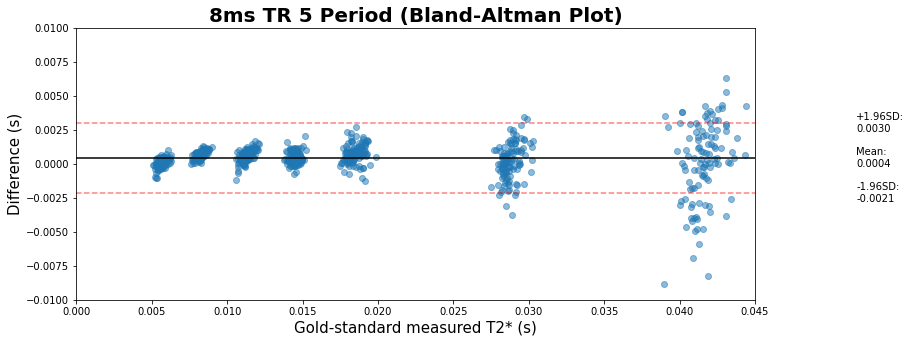

In [128]:
def bland_altman_plot(data1, data2, ax_BA, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    ax_BA.scatter(data1, diff, *args, **kwargs, alpha = 0.5)
    ax_BA.axhline(md,           color='black', linestyle='-')
    ax_BA.axhline(md + 1.96*sd, color='red', linestyle='--', alpha = 0.5)
    ax_BA.axhline(md - 1.96*sd, color='red', linestyle='--', alpha =0.5)
    return md, sd, mean, CI_low, CI_high
###-------------------------------------------------------------------

chosedNum = [11,10,4,5,3,7,9]
chosedNum_axis = [str(11),str(10),str(4),str(5),str(3),str(7),str(9),str(13)]
tr = 8
#gold standard
fa = 90

#N-periodic
Period = [5,6,7,12]
P = 5

BA_plot, ax = plt.subplots(1,figsize = (13,5))
#BA_plot.suptitle(str(tr)+" ms TR (Bland-Altman Plot)", fontweight='bold', fontsize = 20)

###Gold standard
#print(str(tr)+"_"+str(fa))
GOLDSTD_mean = np.asarray([], dtype = float)
GOLDSTD_std = np.asarray([], dtype = float)
GOLDSTD_data = np.asarray([], dtype = float)

T2StarData = np.load("MASK_3RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
for phantomNum in chosedNum:
    GOLDSTD_data = np.append(GOLDSTD_data, T2StarData[phantomNum-1,:])
    GOLDSTD_mean = np.append(GOLDSTD_mean, np.mean(T2StarData[phantomNum-1,:]))
    GOLDSTD_std = np.append(GOLDSTD_std, np.std(T2StarData[phantomNum-1,:]))
    #print("mean:"+str(np.mean(GOLDSTD_6TR_90[phantomNum-1,:]))+"_sd:"+str(np.std(GOLDSTD_6TR_90[phantomNum-1,:])))
#GOLDSTD_data = GOLDSTD_data.reshape(8, int(np.shape(GOLDSTD_data)[0]/8)) 

i = 0

ax_BA = ax
i = i+1
###N Periodic 
N_Period_data = np.asarray([], dtype = float)
N_Period_mean = np.asarray([], dtype = float)
N_Period_std = np.asarray([], dtype = float)
#print(str(tr)+"_"+str(P))
T2StarData = np.load("MASK_3RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(P)+"_Period_10FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
for phantomNum in chosedNum:
    N_Period_data = np.append(N_Period_data, T2StarData[phantomNum-1,:])
    N_Period_mean = np.append(N_Period_mean, np.mean(T2StarData[phantomNum-1,:]))
    N_Period_std = np.append(N_Period_std, np.std(T2StarData[phantomNum-1,:]))
    #print("mean:"+str(np.mean(T2StarData[phantomNum-1,:]))+"_sd:"+str(np.std(T2StarData[phantomNum-1,:])))
#N_Period_data = N_Period_data.reshape(8, int(np.shape(N_Period_data)[0]/8))


# Generate some example data
# diff = N_Period_data - GOLDSTD_data
# mean = np.mean(diff, axis = 1)
# std = np.std(diff, axis = 1)

md, sd, mean, CI_low, CI_high = bland_altman_plot(GOLDSTD_data, N_Period_data, ax_BA)
#ax_BA.set_title(str(P)+" Period "+ str(tr)+"ms TR", fontweight='bold')
plt.title(str(tr)+"ms TR "+str(P)+" Period (Bland-Altman Plot)", fontweight='bold',fontsize = 20)
plt.xlabel("Gold-standard measured T2* (s)",fontsize = 15)
plt.ylabel("Difference (s)",fontsize = 15)
plt.ylim(md - 3.5*sd, md + 3.5*sd)

xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14

plt.text(xOutPlot, md - 1.96*sd, 
    r'-1.96SD:' + "\n" + "%.4f" % CI_low, 
    ha = "left",
    va = "center",
    )
plt.text(xOutPlot, md + 1.96*sd, 
    r'+1.96SD:' + "\n" + "%.4f" % CI_high, 
    ha = "left",
    va = "center",
    )
plt.text(xOutPlot, md, 
    r'Mean:' + "\n" + "%.4f" % md, 
    ha = "left",
    va = "center",
    )
plt.subplots_adjust(right=0.85)
plt.ylim(-0.01,0.01)
plt.xlim(0,0.045)


#ax_BA.figure.savefig("Bland_Altman_Plots/Bland_Altman_Plot_"+str(tr)+"_TR_ALLPeriod_NEW.jpg")
#ax_BA.figure.savefig("Bland_Altman_Plots/Bland_Altman_Plot_"+str(P)+"Period_"+str(tr)+"_TR_v2.jpg")
#ax_BA.show()

### T2* Map

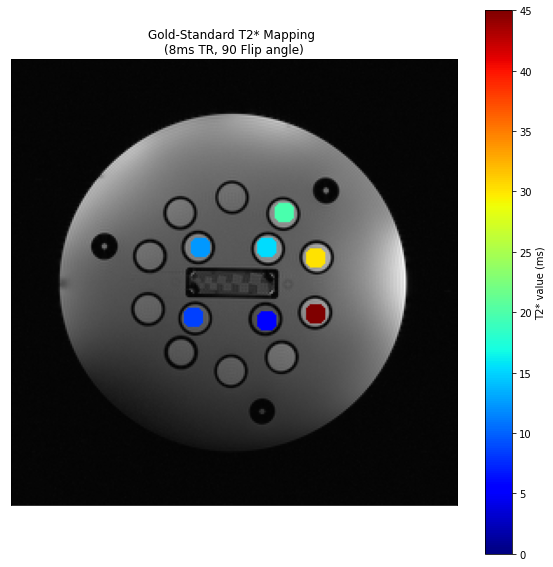

In [11]:
#GOlD Standard Data
# Define colormap
cmap = plt.cm.jet

chosedNum = [11,10,4,5,3,7,9]
#chosedNum = [11,10,4,5,3,7,9,13,14,12]

tr = 8
#gold standard
fa = 90

STANDARD_MASK_LABEL = np.load("MASK_3RESULT/MASKLABEL_4.npy")

DICOM1 = 'recon/multiecho_FLASH/tr'+str(tr)+'_fa'+str(fa)+'_echo1.dcm'
#LOAD DICOM DATA
#For grayscale - 3 layer all equal
img = pydicom.read_file(DICOM1)
GOLDSTD_DATA = img.pixel_array.reshape((256,256,1))
GOLDSTD_DATA = GOLDSTD_DATA/np.max(GOLDSTD_DATA)
GOLDSTD_DATA = np.append(GOLDSTD_DATA, GOLDSTD_DATA, axis = 2)
GOLDSTD_DATA = np.append(GOLDSTD_DATA, GOLDSTD_DATA[:,:,0].reshape((256,256,1)), axis = 2)

#T2* data value
T2StarData = np.load("MASK_3RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
#add as rgb in the array

GOLDSTD_data = np.asarray([], dtype = float)
Quantitative_data = np.zeros((np.shape(GOLDSTD_DATA)[0],np.shape(GOLDSTD_DATA)[1]))
for phantom_num in chosedNum:
    count = 0
    for i in range (0,256):
        for j in range (0,256):
            if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
                # Get the RGBA values for the colormap at each value
                Quantitative_data[i,j] = T2StarData[phantom_num-1,count]

for phantom_num in chosedNum:
    count = 0
    for i in range (0,256):
        for j in range (0,256):
            if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
                # Get the RGBA values for the colormap at each value
                #Quantitative_data[i,j] = T2StarData[phantom_num-1,count]
                rgba_values = cmap(Quantitative_data[i,j]/np.max(Quantitative_data))
                GOLDSTD_DATA[i,j,:] = rgba_values[:3]
                count = count + 1

plt.figure(1,figsize=(10,10))
plt.title("Gold-Standard T2* Mapping \n("+str(tr)+"ms TR, "+str(fa)+" Flip angle)")
plt.imshow(Quantitative_data*1e3, cmap = cmap, vmax = 45, vmin = 0)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.colorbar(label='T2* value (ms)')
plt.imshow(GOLDSTD_DATA)
np.shape(GOLDSTD_data)
#plt.savefig("T2StarMaps/GOLDSTD"+str(tr)+"_TR_"+str(fa)+"_FA_T2StarMap.jpg")

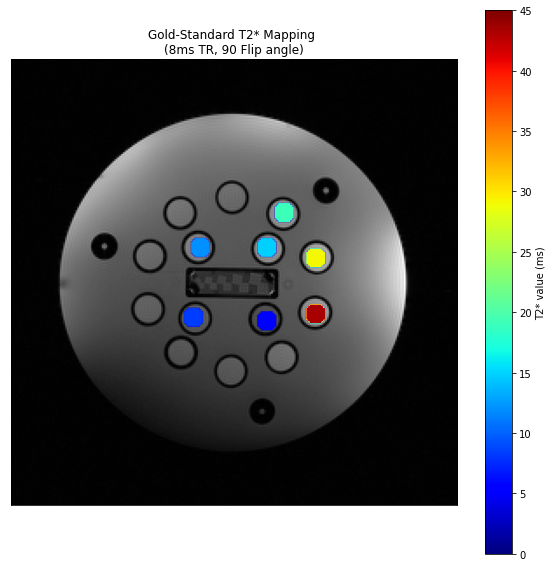

In [12]:
#GOlD Standard Data
# Define colormap
cmap = plt.cm.jet

chosedNum = [11,10,4,5,3,7,9]
#chosedNum = [11,10,4,5,3,7,9,13,14,12]

tr = 8
#gold standard
fa = 90

STANDARD_MASK_LABEL = np.load("MASK_3RESULT/MASKLABEL_4.npy")

DICOM1 = 'recon/multiecho_FLASH/tr'+str(tr)+'_fa'+str(fa)+'_echo1.dcm'
#LOAD DICOM DATA
#For grayscale - 3 layer all equal
img = pydicom.read_file(DICOM1)
GOLDSTD_DATA = img.pixel_array.reshape((256,256,1))
GOLDSTD_DATA = GOLDSTD_DATA/np.max(GOLDSTD_DATA)

#T2* data value
T2StarData = np.load("MASK_3RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
#add as rgb in the array

Quantitative_data = np.zeros((np.shape(GOLDSTD_DATA)[0],np.shape(GOLDSTD_DATA)[1]))

for phantom_num in chosedNum:
    count = 0
    for i in range (0,256):
        for j in range (0,256):
            if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
                # Get the RGBA values for the colormap at each value
                Quantitative_data[i,j] = T2StarData[phantom_num-1,count]



plt.figure(1,figsize=(10,10))
plt.imshow(GOLDSTD_DATA,'gray')
plt.title("Gold-Standard T2* Mapping \n("+str(tr)+"ms TR, "+str(fa)+" Flip angle)")
plt.imshow(Quantitative_data*1e3, cmap = cmap, alpha = 1.0*(Quantitative_data>0), vmax = 45, vmin = 0)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.colorbar(label='T2* value (ms)')


#plt.savefig("T2StarMaps/GOLDSTD"+str(tr)+"_TR_"+str(fa)+"_FA_T2StarMap.jpg")

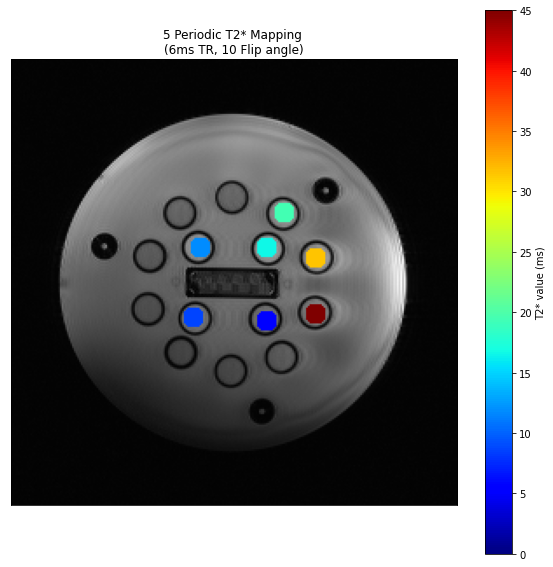

In [26]:
#N Period Data
# Define colormap
cmap = plt.cm.jet

chosedNum = [11,10,4,5,3,7,9]
#chosedNum = [11,10,4,5,3,7,9,13,14,12]

tr = 6
Period = 5
fa = 10
GOLDSTD_data = np.asarray([], dtype = float)
STANDARD_MASK_LABEL = np.load("MASK_3RESULT/MASKLABEL_4.npy")

DICOM1 = 'recon/n_periodic/tr'+str(tr)+'_n'+str(Period)+'_echo1.dcm'
#LOAD DICOM DATA
#For grayscale - 3 layer all equal
img = pydicom.read_file(DICOM1)
GOLDSTD_DATA = img.pixel_array.reshape((256,256,1))
GOLDSTD_DATA = GOLDSTD_DATA/np.max(GOLDSTD_DATA)
GOLDSTD_DATA = np.append(GOLDSTD_DATA, GOLDSTD_DATA, axis = 2)
GOLDSTD_DATA = np.append(GOLDSTD_DATA, GOLDSTD_DATA[:,:,0].reshape((256,256,1)), axis = 2)

# #T2* data value
T2StarData = np.load("MASK_3RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(Period)+"_Period_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
#add as rgb in the array

Quantitative_data = np.zeros((np.shape(GOLDSTD_DATA)[0],np.shape(GOLDSTD_DATA)[1]))
for phantom_num in chosedNum:
    count = 0
    for i in range (0,256):
        for j in range (0,256):
            if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
                # Get the RGBA values for the colormap at each value
                Quantitative_data[i,j] = T2StarData[phantom_num-1,count]

for phantom_num in chosedNum:
    count = 0
    for i in range (0,256):
        for j in range (0,256):
            if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
                # Get the RGBA values for the colormap at each value
                #Quantitative_data[i,j] = T2StarData[phantom_num-1,count]
                rgba_values = cmap(Quantitative_data[i,j]/np.max(Quantitative_data))
                GOLDSTD_DATA[i,j,:] = rgba_values[:3]
                count = count + 1


# #T2StarData = np.load("MASK_3RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
# for phantomNum in chosedNum:
#     GOLDSTD_data = np.append(GOLDSTD_data, T2StarData[phantomNum-1,:])
# GOLDSTD_data = GOLDSTD_data.reshape(np.shape(chosedNum)[0], int(np.shape(GOLDSTD_data)[0]/np.shape(chosedNum)[0])) 

# Quantitative_data = np.zeros((np.shape(GOLDSTD_DATA)[0],np.shape(GOLDSTD_DATA)[1]))
# phantom_n = 0
# for phantom_num in chosedNum:
#     count = 0
#     for i in range (0,256):
#         for j in range (0,256):
#             if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
#                 # Get the RGBA values for the colormap at each value
#                 Quantitative_data[i,j] = T2StarData[phantom_n-1,count]
#                 count = count + 1


plt.figure(1,figsize=(10,10))
plt.title(str(Period)+" Periodic T2* Mapping \n("+str(tr)+"ms TR, "+str(fa)+" Flip angle)")
plt.imshow(Quantitative_data*1e3, cmap = cmap, vmax = 45, vmin = 0)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.colorbar(label='T2* value (ms)')
plt.imshow(GOLDSTD_DATA)

#plt.savefig("T2StarMaps/NPeriod"+str(tr)+"_TR_"+str(Period)+"_Period_T2StarMap.jpg")

(256, 256)

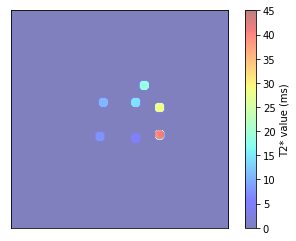

In [12]:
# ###-------------------------------------------------------------------------------
# # Define colormap
# cmap = 'jet'

# chosedNum = [11,10,4,5,3,7,9]
# #chosedNum = [11,10,4,5,3,7,9,13,14,12]

# tr = 8
# #gold standard
# fa = 40
# #N-periodic
# P = 12
# STANDARD_MASK_LABEL = np.load("MASK_3RESULT/MASKLABEL_4.npy")
# DICOM1 = 'recon/multiecho_FLASH/tr'+str(tr)+'_fa'+str(fa)+'_echo1.dcm'
# #LOAD DICOM DATA
# img = pydicom.read_file(DICOM1)
# GOLDSTD_DATA = img.pixel_array.reshape((256,256,1))
# GOLDSTD_DATA = GOLDSTD_DATA/np.max(GOLDSTD_DATA)
# GOLDSTD_DATA = np.append(GOLDSTD_DATA, GOLDSTD_DATA, axis = 2)
# GOLDSTD_DATA = np.append(GOLDSTD_DATA, GOLDSTD_DATA[:,:,0].reshape((256,256,1)), axis = 2)
# #plt.imshow(GOLDSTD_DATA, cmap = 'gray')

# ###Gold standard
# GOLDSTD_mean = np.asarray([], dtype = float)
# GOLDSTD_std = np.asarray([], dtype = float)
# GOLDSTD_data = np.asarray([], dtype = float)

# T2StarData = np.load("MASK_3RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
# for phantomNum in chosedNum:
#     GOLDSTD_data = np.append(GOLDSTD_data, T2StarData[phantomNum-1,:])
#     GOLDSTD_mean = np.append(GOLDSTD_mean, np.mean(T2StarData[phantomNum-1,:]))
#     GOLDSTD_std = np.append(GOLDSTD_std, np.std(T2StarData[phantomNum-1,:]))
#     #print("mean:"+str(np.mean(GOLDSTD_6TR_90[phantomNum-1,:]))+"_sd:"+str(np.std(GOLDSTD_6TR_90[phantomNum-1,:])))
# GOLDSTD_data = GOLDSTD_data.reshape(np.shape(chosedNum)[0], int(np.shape(GOLDSTD_data)[0]/np.shape(chosedNum)[0])) 

# Quantitative_data = np.zeros((np.shape(GOLDSTD_DATA)[0],np.shape(GOLDSTD_DATA)[1]))
# phantom_n = 0
# for phantom_num in chosedNum:
#     count = 0
#     for i in range (0,256):
#         for j in range (0,256):
#             if(STANDARD_MASK_LABEL[i,j]== (phantom_num)):
#                 # Get the RGBA values for the colormap at each value
#                 Quantitative_data[i,j] = GOLDSTD_data[phantom_n,count]
#                 count = count + 1
#     phantom_n = phantom_n+1

# plt.imshow(Quantitative_data*1e3, cmap = cmap, alpha = 0.5, vmax = 45, vmin = 0)
# plt.gca().set_xticks([])
# plt.gca().set_yticks([])
# plt.colorbar(label='T2* value (ms)')
# np.shape(Quantitative_data)


In [79]:
np.max(T2StarData)

0.5076607873003829

In [72]:
M = STANDARD_MASK_LABEL

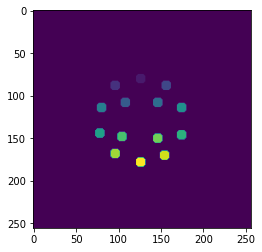

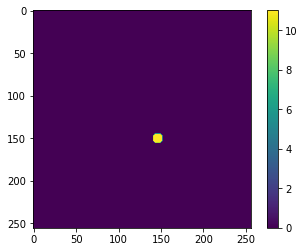

In [73]:
M = STANDARD_MASK_LABEL
M_new = M
plt.figure(1)
plt.imshow(M)
for i in range (0,256):
    for j in range (0,256):
        if (M[i,j]!=11):
            M_new[i,j]=0
plt.figure(2)
plt.imshow(M)
plt.colorbar()

### Simply Read Data code

In [2]:
TR = [6, 8]
FA = [20,40,60,90]
chosedNum = [11,10,4,5,3,7,9,13,14]

for tr in TR:
    for fa in FA:
        print(str(tr)+"_"+str(fa))
        X = np.load("MASK_3RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
        for phantomNum in chosedNum:
            print("mean:"+str(np.mean(X[phantomNum-1,:]))+"_sd:"+str(np.std(X[phantomNum-1,:])))
        

6_20
mean:0.005442608729182234_sd:0.0002401758307625024
mean:0.007517677661331108_sd:0.0002686222922006897
mean:0.01087673199115423_sd:0.00028590609386591244
mean:0.01498722892581147_sd:0.00035446889584138624
mean:0.019368255732237404_sd:0.00037592782732784384
mean:0.029458345565755027_sd:0.0009112961922037785
mean:0.04113658301353197_sd:0.0011064673786922421
mean:0.056626294415017035_sd:0.0027315471955716986
mean:0.08361566020918969_sd:0.005530006259350173
6_40
mean:0.00513061065894358_sd:0.00010753797411195661
mean:0.007400255286519588_sd:0.0001711753315426531
mean:0.010653172276286713_sd:0.00015136689702494483
mean:0.014416835449417187_sd:0.00023919546220708634
mean:0.018661211576748656_sd:0.0003605912320203521
mean:0.028546786948032157_sd:0.0005863692798069562
mean:0.04090568074908653_sd:0.0006598240782269223
mean:0.058445095457041005_sd:0.002673545778024501
mean:0.08145333518721239_sd:0.004898322660979317
6_60
mean:0.005156461241332889_sd:7.61219462373767e-05
mean:0.00749354718287

In [3]:
Period = [5,6,7,12]
TR = [6,8]
NPeriodData = np.asarray([], dtype = float) # in the order #11, #10, #4
chosedNum = [11,10,4,5,3,7,9,13,14]
for tr in TR:
    for P in Period:
        print(str(tr)+"_"+str(P))
        X = np.load("MASK_3RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(P)+"_Period_10FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
        for phantomNum in chosedNum:
            print("mean:"+str(np.mean(X[phantomNum-1,:]))+"_sd:"+str(np.std(X[phantomNum-1,:])))
        

6_5
mean:0.0052218552614118645_sd:0.00021672509424246466
mean:0.007310434642650987_sd:0.00022770799059259144
mean:0.010419790373586991_sd:0.00032302621071759243
mean:0.013848101724706447_sd:0.0006516793707316528
mean:0.017577000724499928_sd:0.0009939225699218239
mean:0.028129594427732784_sd:0.0017739840340662335
mean:0.03996540088387927_sd:0.0028465927920815447
mean:0.05792664828308823_sd:0.008863124644210758
mean:0.08401457442341016_sd:0.01727065183728065
6_6
mean:0.005249698931973036_sd:0.00017431652205977287
mean:0.0075577678946597724_sd:0.00023181714988415678
mean:0.010684423676404858_sd:0.0004092545814937378
mean:0.014836938313065819_sd:0.0007372877930493639
mean:0.017671641699886817_sd:0.0008037010316134116
mean:0.029203416923483935_sd:0.0014243038908167839
mean:0.04220538245803587_sd:0.002841418217568652
mean:0.06287514893683702_sd:0.01790674860241155
mean:0.13404888818037702_sd:0.23701207342719116
6_7
mean:0.005148643281862777_sd:0.00018404425406099218
mean:0.007331782520998606

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
true_values = np.random.normal(10, 2, 100)
measured_values = true_values + np.random.normal(0, 1, 100)

# Calculate the mean and difference of the two measurements
mean = np.mean([true_values, measured_values], axis=0)
diff = true_values - measured_values

# Calculate the mean difference and the limits of agreement
mean_diff = np.mean(diff)
sd_diff = np.std(diff, ddof=1)
loa = mean_diff + 1.96 * sd_diff, mean_diff - 1.96 * sd_diff

# Plot the Bland-Altman plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(mean, diff, s=10, alpha=0.5)
ax.axhline(mean_diff, color='gray', linestyle='--')
ax.axhline(loa[0], color='gray', linestyle='--')
ax.axhline(loa[1], color='gray', linestyle='--')
ax.set_xlabel('Mean')
ax.set_ylabel('Difference')
ax.set_title('Bland-Altman plot')

plt.show()

In [8]:
for tr in TR:
    for fa in FA:
        print(str(tr)+"_"+str(fa))
        for phantomNum in range(0,14):
            X = np.load("MASK_3RESULT/GOLDstandardT2Star/"+str(tr)+"TR_"+str(fa)+"FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
            print(np.mean(X[phantomNum,:]))
            print(np.std(X[phantomNum,:]))
        

6_20
0.29006071926198695
0.12310252585142117
0.11485026069955327
0.025390990909129597
0.019368255732237404
0.00037592782732784384
0.01087673199115423
0.00028590609386591244
0.01498722892581147
0.00035446889584138624
0.17788245959803772
0.026186360851941103
0.029458345565755027
0.0009112961922037785
0.15527034226518716
0.014793944451912518
0.04113658301353197
0.0011064673786922421
0.007517677661331108
0.0002686222922006897
0.005442608729182234
0.0002401758307625024
0.11604203102750946
0.014694420747010828
0.056626294415017035
0.0027315471955716986
0.08361566020918969
0.005530006259350173
6_40
0.22162461822916438
0.09013740060748733
0.0819034364262737
0.020290447285477964
0.018661211576748656
0.0003605912320203521
0.010653172276286713
0.00015136689702494483
0.014416835449417187
0.00023919546220708634
0.1528177994348697
0.020164160066012217
0.028546786948032157
0.0005863692798069562
0.14363815176218372
0.010950661222310252
0.04090568074908653
0.0006598240782269223
0.007400255286519588
0.0

In [4]:
Period = [5,6,7,12]
TR = [6,8]
for tr in TR:
    for P in Period:
        print(str(tr)+"_"+str(P))
        X = np.load("MASK_3RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(P)+"_Period_10FA_T2StarValueFor14PhantomSpheres_LESSECHOTEST_MASK4.npy")
        for phantomNum in range(0,14):
            print(np.mean(X[phantomNum,:]))
            print(np.std(X[phantomNum,:]))
      

6_5
0.24170656154183567
3.566360598849053
0.11759065518371066
0.046702424338271924
0.017620919342143312
0.0009279507130376977
0.010378256407887131
0.00026909862303192234
0.01380825364577258
0.0005500192382769982
0.22523922463195173
0.2598556377259477
0.028044007723676052
0.0019011849387172038
0.15798088634230573
0.08488048808556785
0.039439144474021255
0.003195610357066235
0.007233987427127235
0.00021006846109756366
0.005177178596293211
0.00021500141077012759
0.11988664473616474
0.04072902839369816
0.056427253887857784
0.009558908829995705
0.08043237397552416
0.01675335970475299
6_6
0.3181727710480624
0.503112890303731
0.10420256464200868
0.027311420021702438
0.017837411619565438
0.0007030155327768193
0.010551358466808443
0.0003769566968136071
0.014006567984559667
0.0003601023000439959
0.16993884083663469
0.2293992280787882
0.028777099507392524
0.0010619443616790634
0.1638130882594425
0.03797476357121461
0.04127596784524106
0.0021907417207068054
0.007358331644885511
0.00018552068811138

In [3]:
Period = [5,6,7,12]
TR = [6,8]
for tr in TR:
    for P in Period:
        print(str(tr)+"_"+str(P))
        X = np.load("MASK_3RESULT/NPeriodicT2Star/"+str(tr)+"TR_"+str(P)+"_Period_10FA_T2StarValueFor14PhantomSpheres_MASK4.npy")
        for phantomNum in range(0,14):
            print(np.mean(X[phantomNum,:]))
            print(np.std(X[phantomNum,:]))
      

6_5
0.4511087748798597
0.9649567549086646
0.10472068743450468
0.03693483896214513
0.017577000724499928
0.0009939225699218239
0.010419790373586991
0.00032302621071759243
0.013848101724706447
0.0006516793707316528
0.19869628657836064
0.10616327578620896
0.028129594427732784
0.0017739840340662335
0.17127903474667538
0.14522875930252088
0.03996540088387927
0.0028465927920815447
0.007310434642650987
0.00022770799059259144
0.0052218552614118645
0.00021672509424246466
0.1205562695699397
0.0363380143981679
0.05792664828308823
0.008863124644210758
0.08401457442341016
0.01727065183728065
6_6
0.12222163666277458
0.47427605422566105
0.08454122708045149
0.019841632024036472
0.017671641699886817
0.0008037010316134116
0.010684423676404858
0.0004092545814937378
0.014836938313065819
0.0007372877930493639
0.20821928238374945
0.7224819308402296
0.029203416923483935
0.0014243038908167839
0.2794497316127531
0.15975738746912257
0.04220538245803587
0.002841418217568652
0.0075577678946597724
0.000231817149884